C:\Users\Bogda\AppData\Local\Temp\ipykernel_16088\2712064991.py:15: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "end": datetime.utcnow().strftime("%Y-%m-%dT00:00:00Z"),


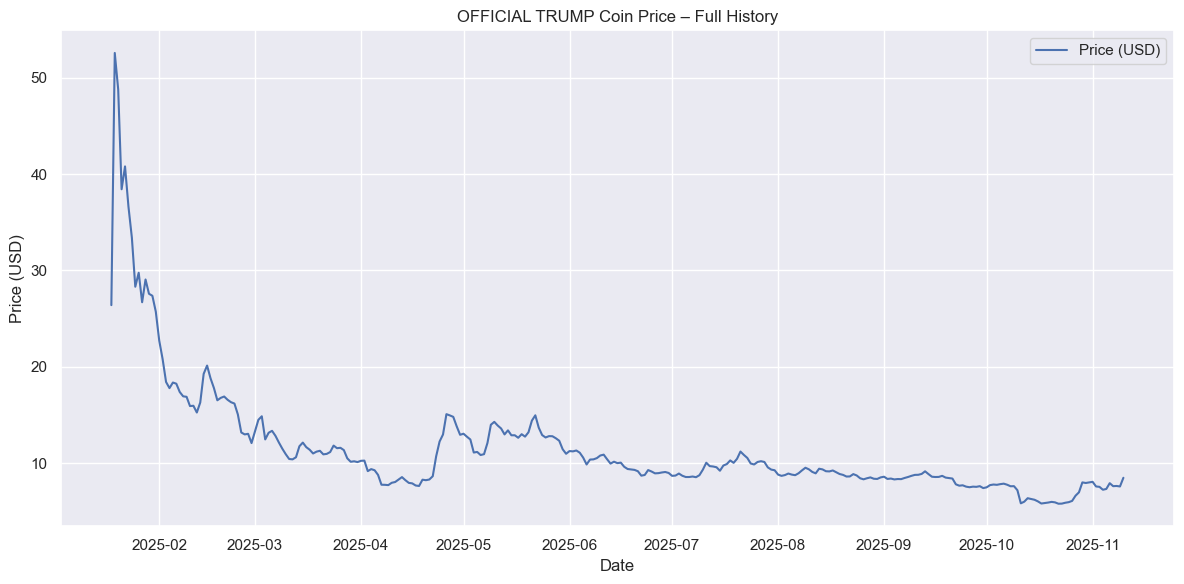

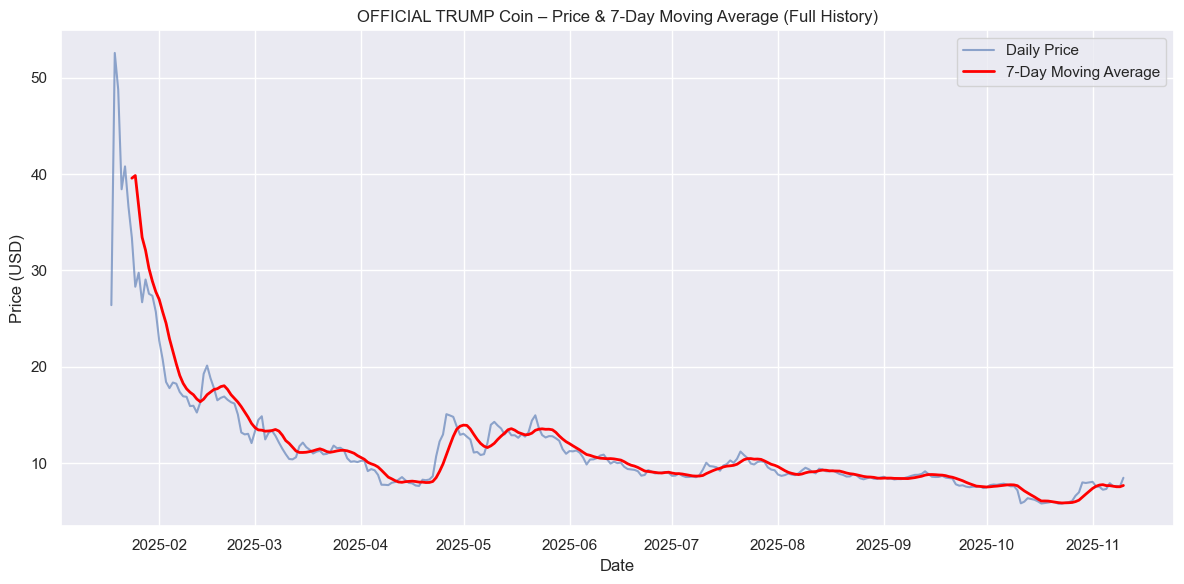

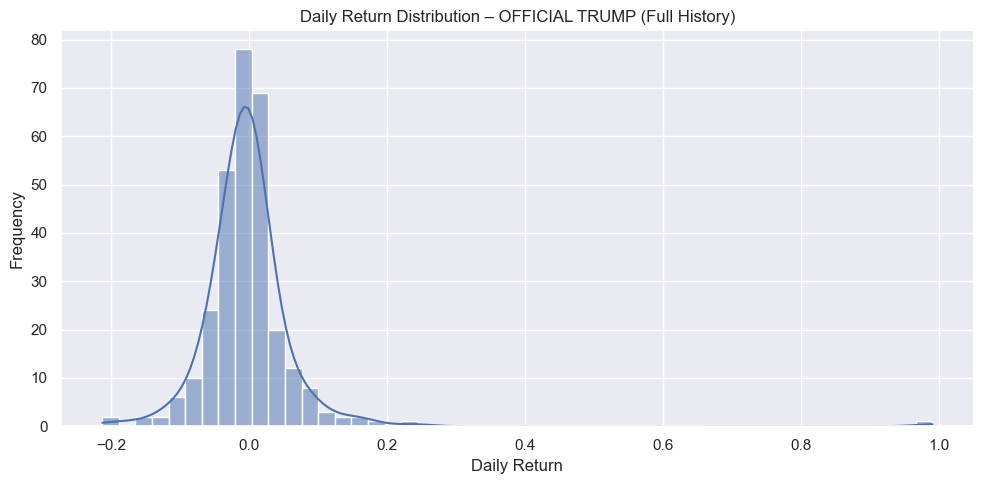

Summary statistics for price:
count    297.000000
mean      11.448316
std        6.049385
min        5.800000
25%        8.460000
50%        9.570000
75%       12.590000
max       52.560000
Name: price_usd, dtype: float64

Summary statistics for daily returns:
count    296.000000
mean      -0.001481
std        0.077307
min       -0.212382
25%       -0.026902
50%       -0.005295
75%        0.012936
max        0.990909
Name: daily_return, dtype: float64

Days with > ±10% Daily Price Moves:
            price_usd  daily_return  price_change_7d        MA7
date                                                           
2025-01-19      52.56      0.990909              NaN        NaN
2025-01-21      38.42     -0.212382              NaN        NaN
2025-01-23      36.63     -0.101986              NaN        NaN
2025-01-25      28.31     -0.152395         0.072348  39.841429
2025-01-27      26.70     -0.102823        -0.452645  33.430000
2025-02-01      22.73     -0.116252        -0.197103  26.98

In [10]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

sns.set(style="darkgrid")

# 2. Fetch historical price data from CoinPaprika
# We'll use the coin ID "trump-official-trump" (you can check their /tickers endpoint to confirm)
url = "https://api.coinpaprika.com/v1/tickers/trump-official-trump/historical"
params = {
    "start": "2025-01-17T00:00:00Z",   # approximate launch date
    "end": datetime.utcnow().strftime("%Y-%m-%dT00:00:00Z"),
    "interval": "1d"
}

resp = requests.get(url, params=params)
resp.raise_for_status()
data = resp.json()

# 3. Prepare dataframe
df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["timestamp"]).dt.date
df = df.rename(columns={"price": "price_usd"})
df = df[["date", "price_usd"]].set_index("date")

# 4. Compute metrics
df["daily_return"] = df["price_usd"].pct_change()
df["price_change_7d"] = df["price_usd"].pct_change(7)
df["MA7"] = df["price_usd"].rolling(7).mean()

# 5. Price over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df["price_usd"], label="Price (USD)")
plt.title("OFFICIAL TRUMP Coin Price – Full History")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

# 6. Price with 7-day moving average
plt.figure(figsize=(12,6))
plt.plot(df.index, df["price_usd"], label="Daily Price", alpha=0.6)
plt.plot(df.index, df["MA7"], label="7-Day Moving Average", color="red", linewidth=2)
plt.title("OFFICIAL TRUMP Coin – Price & 7-Day Moving Average (Full History)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

# 7. Daily return distribution
plt.figure(figsize=(10,5))
sns.histplot(df["daily_return"].dropna(), bins=50, kde=True)
plt.title("Daily Return Distribution – OFFICIAL TRUMP (Full History)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 8. Summary statistics
print("Summary statistics for price:")
print(df["price_usd"].describe())
print("\nSummary statistics for daily returns:")
print(df["daily_return"].describe())

# 9. Detect large fluctuations
big_moves = df[df["daily_return"].abs() > 0.10]
print("\nDays with > ±10% Daily Price Moves:")
print(big_moves)

# 10. Save data
df.to_csv("official_trump_price_full_history.csv", index=True)
print("Data saved to official_trump_price_full_history.csv")